
#   Hotel Check-in Abandonment Forecasting Model

### Mini Problem Statements 
#### 1. Data Loading and Reading
#### 2. Data Cleaning and Preprocessing
#### 3. Exploratory Data Analysis (EDA) to analyze the origin of guests
#### 4. EDA to analyze the price paid per night by guests
#### 5. EDA to identify the busiest months for bookings
#### 6. EDA to identify the month with the highest Average Daily Rate (ADR)
#### 7. EDA to analyze whether bookings were made for weekdays, weekends, or both
#### 8. Feature Engineering to create new features
#### 9. Feature Encoding to transform categorical variables into numerical ones
#### 10. Outlier Detection and Handling
#### 11. Feature Selection using Correlation and Univariate Analysis
#### 12. Identifying important features for model building
#### 13. Building a Machine Learning Model
#### 14. Model Cross-Validation
#### 15. Experimenting with Multiple Algorithms for Model Building.
##### Collect data raw data
  csv/tsv/json(for sending data from 1server to another)/gson
storing data
sqlcentricity  -> tables and colm/rows
no sql -> document centric -> web scrapping , iot devices

### data cleaning/ data wangling

before building ml model understand the data
diff patterns in the data
eda -> analysing the  data


### featre engineering
ml or deep learning algo
optimise and hypertune the data


### panadas help for lot of data visulalisations model
### seaborn
-- numercal model -> numpy

# 1. Data Loading and Reading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## data cleaning 
clean the data so that you can perform the a lot of operations

### missing value
### data type is correct or not
### structural error
### duplicate observations

# 2. Data Cleaning and Preprocessing

In [6]:
df.shape

(119390, 32)

In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# if missing values in data
deleting the data
or imputing by filling with mode/median/mean

In [8]:
df.drop(['agent','company'],axis=1,inplace=True) #implace in the changes 
# axis 0 -> rows , axis 1 ->columns
# A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.

In [9]:
df['country'].value_counts().index[0]

'PRT'

In [10]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
df.fillna(0,inplace=True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [15]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
df[~filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [17]:
df[filter1].adults

2224      0
2409      0
3181      0
3684      0
3708      0
         ..
115029    0
115091    0
116251    0
116534    0
117087    0
Name: adults, Length: 180, dtype: int64

In [18]:
data = df[~filter1]

In [19]:
data.shape

(119210, 30)

In [20]:
df.shape

(119390, 30)

In [21]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


 # 3. Exploratory Data Analysis (EDA) to analyze the origin of guests

In [22]:
# data were the booking is not cancelled
data['is_canceled'].unique()
# 0-> not cancelleed
# 1- > cancelled

array([0, 1], dtype=int64)

In [23]:
data[data['is_canceled']==0]['country'].value_counts()

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
ZMB        1
MAC        1
BDI        1
MRT        1
SMR        1
Name: country, Length: 165, dtype: int64

In [24]:
len(data[data['is_canceled']==0])

75011

In [25]:
data[data['is_canceled']==0]['country'].value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
ZMB    0.000013
MAC    0.000013
BDI    0.000013
MRT    0.000013
SMR    0.000013
Name: country, Length: 165, dtype: float64

In [26]:
(data[data['is_canceled']==0]['country'].value_counts()/75011)*100 

PRT    28.526483
GBR    12.888776
FRA    11.289011
ESP     8.509419
DEU     8.088147
         ...    
ZMB     0.001333
MAC     0.001333
BDI     0.001333
MRT     0.001333
SMR     0.001333
Name: country, Length: 165, dtype: float64

In [27]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [28]:
country_wise_data.columns=['country','no_of_guests']

In [29]:
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,ZMB,1
161,MAC,1
162,BDI,1
163,MRT,1


In [30]:
#!pip install plotly

In [31]:
#!pip install chart_studio

In [32]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

In [33]:
import plotly.express as px

In [34]:
map_guest=px.choropleth(country_wise_data,
                       locations=country_wise_data['country'],
                        color=country_wise_data['no_of_guests'],
                        hover_name=country_wise_data['country'],
                        title='home country of guest'
                       )

In [35]:
map_guest.show()

# how much people pay per night 
# room        avg_price
  a     ->      1k
  b     ->      1.5k
  c     ->      1.21k
  

# 4. EDA to analyze the price paid per night by guests

In [36]:
data2=data[data['is_canceled']==0]

In [37]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0, 0.5, 'price(EUR)')

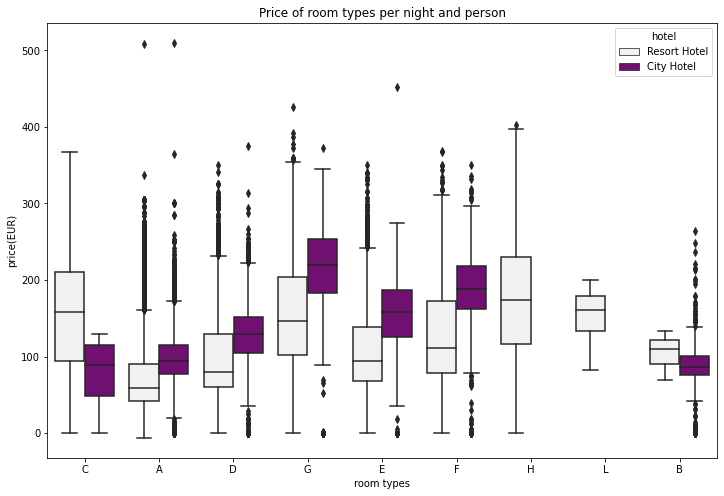

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(color='purple', x='reserved_room_type', y='adr', hue='hotel',data=data2)
#adr = average daily rate
plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price(EUR)')

#  5. EDA to identify the busiest months for bookings

In [39]:
# which are the most busy month

data['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [40]:
#seperating the data of resort hotel which is not cancelled and city hotel which is not cancelled
data_resort=data[(data['hotel']=='Resort Hotel')&(data['is_canceled']==0)]

In [41]:
data_city=data[(data['hotel']=='City Hotel')&(data['is_canceled']==0)]

In [42]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [43]:
data_city.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,...,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [44]:
data_city['arrival_date_month'].value_counts()

August       5367
July         4770
May          4568
June         4358
October      4326
September    4283
March        4049
April        4010
February     3051
November     2676
December     2377
January      2249
Name: arrival_date_month, dtype: int64

In [45]:
data_city['arrival_date_month'].value_counts().reset_index()

,index,arrival_date_month
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [46]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()

In [47]:
rush_city.columns=['month','no_of_guests']

In [48]:
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [49]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [50]:
final_rush=rush_resort.merge(rush_city,on='month')

In [51]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [52]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [53]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [54]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort','no_of_guests_city'])

In [55]:
#!pip install sorted-months-weekdays
# for sorted months and week days

In [56]:
#!pip install sort_dataframeby_monthorweek

In [57]:
import sort_dataframeby_monthorweek as sd

In [58]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [59]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [60]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort','no_of_guests_city'])

In [61]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort','no_of_guests_city'])

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

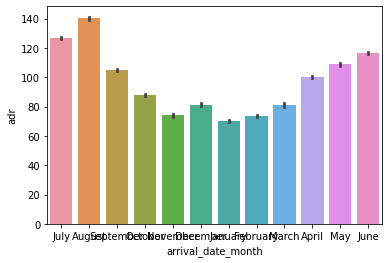

In [62]:
sns.barplot(x='arrival_date_month',y='adr',data=data)

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

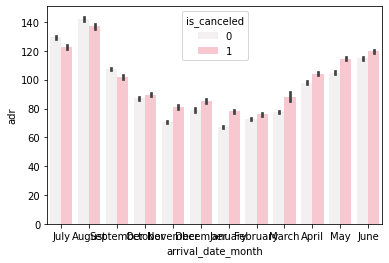

In [63]:
sns.barplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled',color='pink')

# 6. EDA to identify the month with the highest Average Daily Rate (ADR)

In [64]:
data =sd.Sort_Dataframeby_Month(data,'arrival_date_month')

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

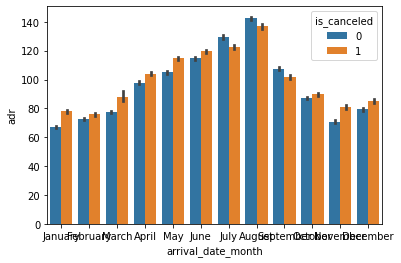

In [65]:
sns.barplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')

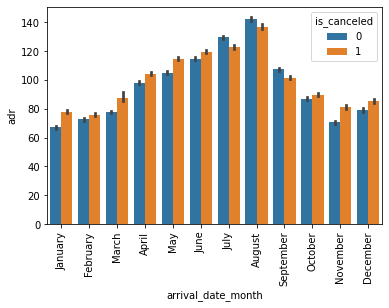

In [66]:
# for rotation of text on same plane
sns.barplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

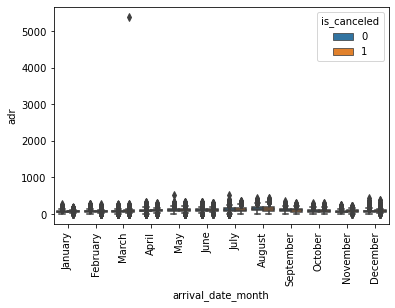

In [67]:
# box plot
sns.boxplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

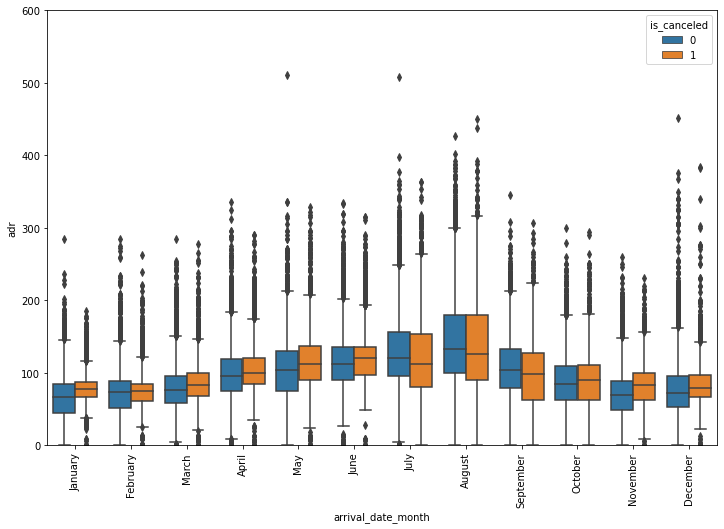

In [68]:
# for reszing

plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.ylim(0,600)
plt.show()



#  7. EDA to analyze whether bookings were made for weekdays, weekends, or both

In [69]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [70]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1]>0:
        return 'stay_just_weekend'
    elif row[feature2]>0 and row[feature1]==0:
        return 'stay_just_weekdays'
    elif row[feature2]>0 and row[feature1]>0:
        return 'stay_just_weekdays_weekends'
    else:
        return 'undefined_data'

In [72]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [73]:
data2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data


In [74]:
data2['weekend_or_weekday'].value_counts()


stay_just_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [75]:

type(sd)


module

In [76]:

data2.groupby(['arrival_date_month','weekend_or_weekday']).size()


arrival_date_month  weekend_or_weekday         
April               stay_just_weekdays             2559
                    stay_just_weekdays_weekends    3627
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_just_weekdays             3137
                    stay_just_weekdays_weekends    4929
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_just_weekdays             2123
                    stay_just_weekdays_weekends    1901
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_just_weekdays             2514
                    stay_just_weekdays_weekends    2438
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_just_weekdays             2125


In [77]:

data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [78]:

data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack()

weekend_or_weekday,stay_just_weekdays,stay_just_weekdays_weekends,stay_just_weekend,undefined_data
arrival_date_month,,,,
April,2559,3627,344,30
August,3137,4929,509,49
December,2123,1901,298,69
February,2514,2438,360,47
January,2125,1550,393,47
July,2818,4570,462,57
June,2685,3241,433,36
March,3060,3151,359,50
May,3017,3442,570,74


In [79]:

data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

weekend_or_weekday,arrival_date_month,stay_just_weekdays,stay_just_weekdays_weekends,stay_just_weekend,undefined_data
0,April,2559,3627,344,30
1,August,3137,4929,509,49
2,December,2123,1901,298,69
3,February,2514,2438,360,47
4,January,2125,1550,393,47
5,July,2818,4570,462,57
6,June,2685,3241,433,36
7,March,3060,3151,359,50
8,May,3017,3442,570,74
9,November,2214,2117,261,59


In [80]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()


In [81]:

sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [82]:
sorted_data

,arrival_date_month,stay_just_weekdays,stay_just_weekdays_weekends,stay_just_weekend,undefined_data
0,January,2125,1550,393,47
1,February,2514,2438,360,47
2,March,3060,3151,359,50
3,April,2559,3627,344,30
4,May,3017,3442,570,74
5,June,2685,3241,433,36
6,July,2818,4570,462,57
7,August,3137,4929,509,49
8,September,2692,3192,479,22
9,October,2844,3393,582,82


<AxesSubplot:>

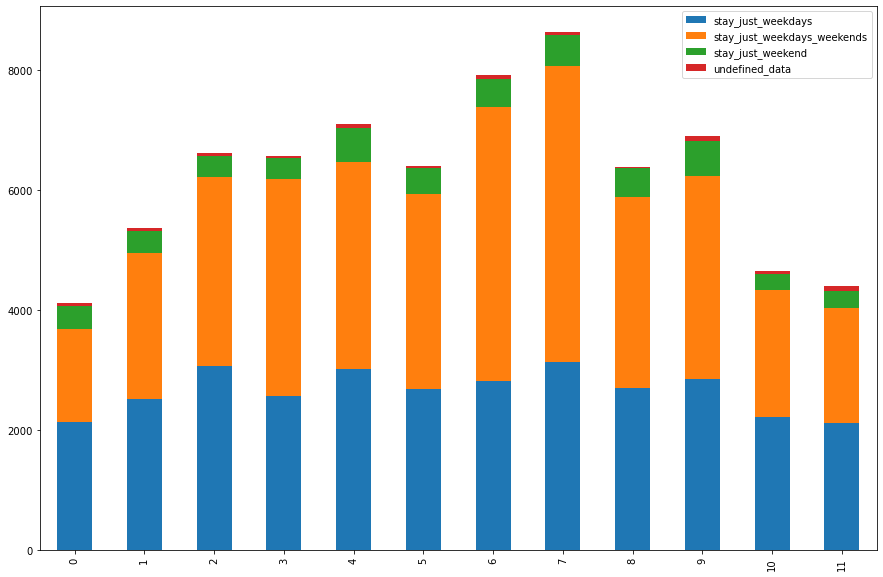

In [83]:

sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

#  8. Feature Engineering to create new features

In [84]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [85]:
def family(row):
    if(row['adults']>0) & (row['children']>0 or row['babies']>0):
        return 1
    else: 
        return 0

In [86]:
data.apply(family,axis=1)

0         0
1         1
2         0
3         0
4         1
         ..
119205    1
119206    0
119207    0
119208    0
119209    0
Length: 119210, dtype: int64

In [87]:
data['is_family']=data.apply(family,axis=1)


In [88]:
data['total_customer']=data['adults']+data['children']+data['babies']

In [89]:
data['total_nights']=data["stays_in_week_nights"]+data["stays_in_weekend_nights"]

In [90]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1


In [91]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [92]:
data['deposit_type']

0         No Deposit
1         No Deposit
2         No Deposit
3         No Deposit
4         No Deposit
             ...    
119205    No Deposit
119206    No Deposit
119207    No Deposit
119208    No Deposit
119209    No Deposit
Name: deposit_type, Length: 119210, dtype: object

In [93]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [94]:
dict1={'No Deposit':0,'Non Refund':1,'Refundable':0}

In [95]:
data['deposit_type'].map(dict1)

0         0
1         0
2         0
3         0
4         0
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: deposit_type, Length: 119210, dtype: int64

In [96]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [97]:
data.drop(columns=['adults','children','babies','deposit_type'],axis=1,inplace=True)

In [98]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

# 9. Feature Encoding to transform categorical variables into numerical ones

In [99]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,BB,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,BB,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,HB,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,BB,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0
5,Resort Hotel,1,76,2016,January,1,1,1,2,BB,...,Transient,57.90,0,1,Canceled,12/20/2015,0,2.0,3,0


In [100]:
data.first

<bound method NDFrame.first of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        109               2016   
1       Resort Hotel            0        109               2016   
2       Resort Hotel            1          2               2016   
3       Resort Hotel            0         88               2016   
4       Resort Hotel            1         20               2016   
...              ...          ...        ...                ...   
119205    City Hotel            0        173               2016   
119206    City Hotel            0         17               2016   
119207    City Hotel            0        107               2016   
119208    City Hotel            0        310               2016   
119209    City Hotel            0        310               2016   

       arrival_date_month  arrival_date_week_number  \
0                 January                         1   
1                 January                         1   

# feature encording 
                  FE
 catogorical data ----> Numerical

In [101]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [102]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [103]:
cate_features=[col for col in data.columns if data[col].dtypes=='object']

In [104]:
num_features=[col for col in data.columns if data[col].dtypes!='object']


In [105]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [106]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [107]:
data[cate_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015
...,...,...,...,...,...,...,...,...,...,...,...
119205,City Hotel,December,BB,BRA,Direct,Direct,E,F,Transient,Check-Out,1/6/2017
119206,City Hotel,December,SC,FRA,Online TA,TA/TO,A,A,Transient,Check-Out,1/6/2017
119207,City Hotel,December,BB,FRA,Offline TA/TO,TA/TO,A,B,Transient,Check-Out,1/7/2017
119208,City Hotel,December,SC,DEU,Online TA,TA/TO,A,A,Transient-Party,Check-Out,1/8/2017


In [108]:
data_cat=data[cate_features]

In [109]:
data.groupby(['hotel'])['is_canceled'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: is_canceled, dtype: float64

In [110]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [111]:
data_cat.head(6)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015
5,Resort Hotel,January,BB,PRT,Online TA,TA/TO,A,A,Transient,Canceled,12/20/2015


In [112]:
data_cat['cancellation']=data['is_canceled']

In [113]:
data_cat.head(6)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1
5,Resort Hotel,January,BB,PRT,Online TA,TA/TO,A,A,Transient,Canceled,12/20/2015,1


In [114]:
data['is_canceled']

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119210, dtype: int64

In [115]:
data_cat.head()  

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,Transient,Canceled,12/22/2015,1


In [116]:
cols=data_cat.columns

In [117]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [118]:
cols=cols[0:-1]

In [119]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [120]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,Transient,No-Show,1/1/2016,1


In [121]:
for i in cols:
    dict2=data_cat.groupby([i])['cancellation'].mean().to_dict()
    data_cat[i]=data_cat[i].map(dict2)

In [122]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1,0.101010,1


In [123]:
data['days_in_waiting_list']

0         0
1         0
2         0
3         0
4         0
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: days_in_waiting_list, Length: 119210, dtype: int64

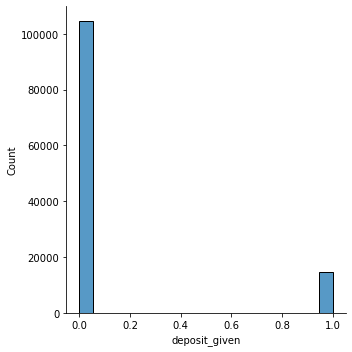

In [124]:
sns.displot(data['deposit_given'])

# 10. Outlier Detection and Handling

In [125]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,0,0,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,0,0,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,0,0,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,0,0,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,0,0,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,0,0,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,0,0,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,0,0,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,0,0,0,2,0,68.57,0,2,0,2.0,12,0


In [126]:
#concat the numfeature and data cat in datacat

In [127]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [128]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1,...,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0,...,0,4,0,117.82,0,1,1,3.0,11,0
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,90.34,0,1,0,2.0,7,0
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0,...,0,0,0,103.57,0,0,0,2.0,7,0
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0,...,0,2,0,68.57,0,2,0,2.0,12,0


In [129]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [130]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

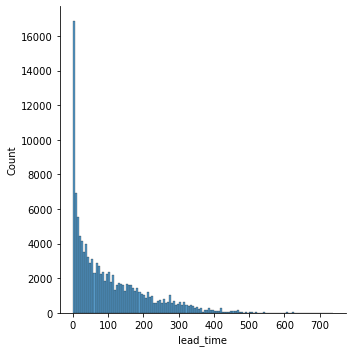

In [131]:
sns.displot(dataframe['lead_time'])

In [132]:
def handle_outliner(col):
    dataframe[col]=np.log1p(dataframe[col])

In [133]:
handle_outliner('lead_time')
plt.rcParams["patch.force_edgecolor"] = True

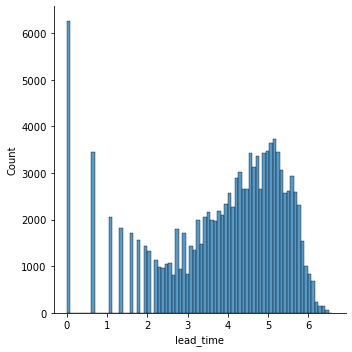

In [134]:
sns.displot(dataframe['lead_time'])

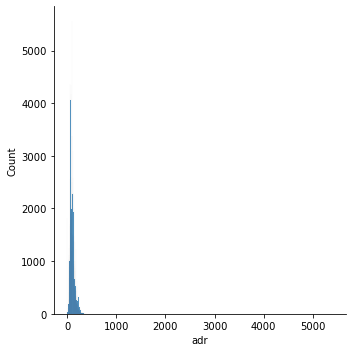

In [135]:
sns.displot(dataframe['adr'])

In [136]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [137]:
dataframe[dataframe['adr']<0].columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [138]:
handle_outliner('adr')

In [139]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\KIIT\anaconda3\python.exe
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [140]:
dataframe['adr'].isnull().sum()

1

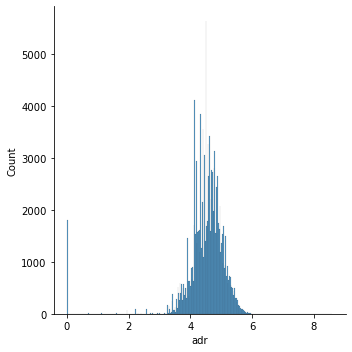

In [141]:
sns.displot(dataframe['adr'].dropna())

# 11. Feature Selection using Correlation and Univariate Analysis

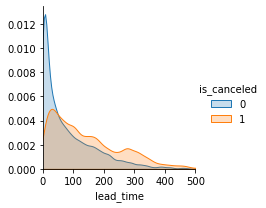

In [142]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [143]:
corr=dataframe.corr()

In [144]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


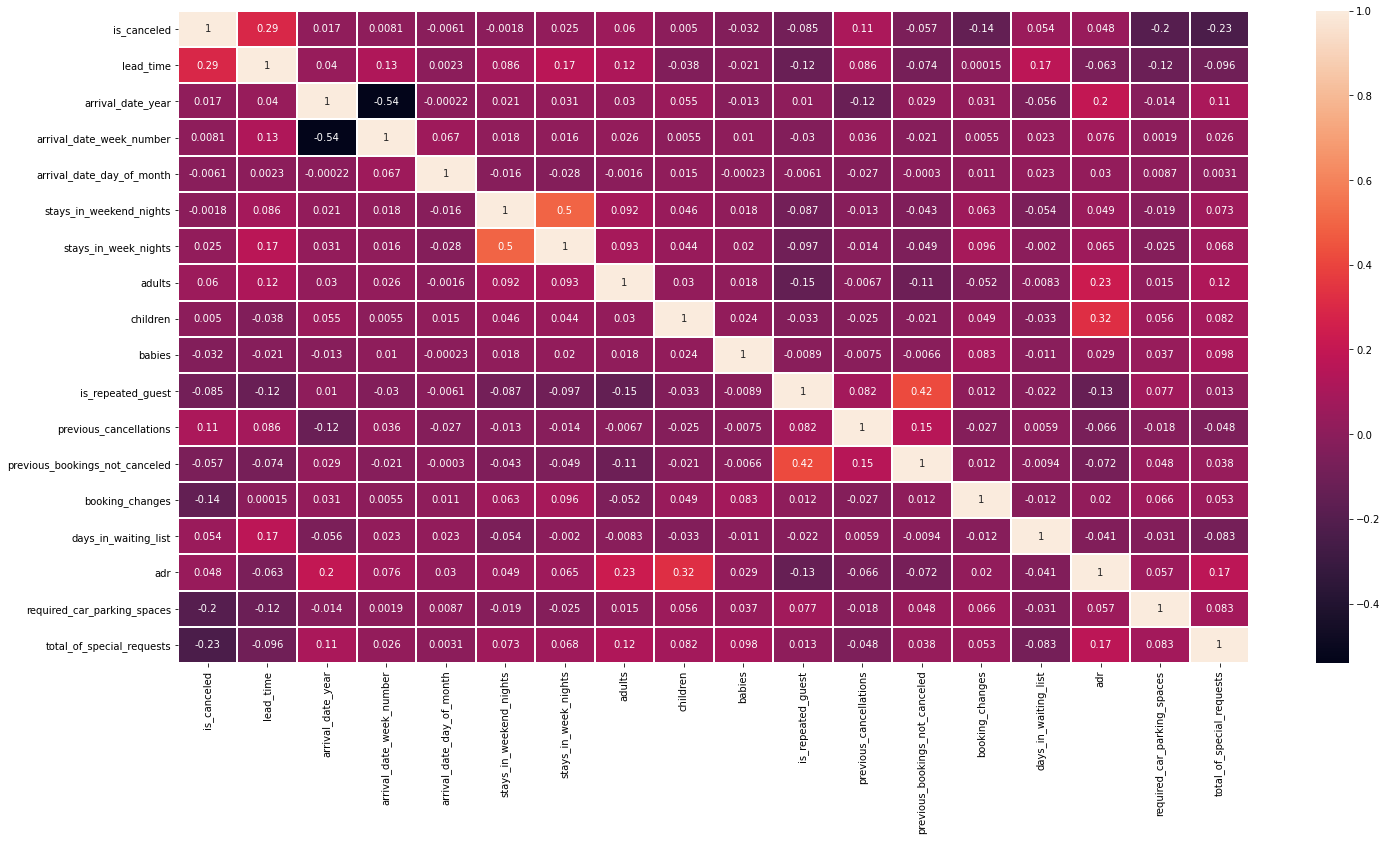

In [145]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [146]:
corr['is_canceled']

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005036
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [147]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [148]:
# Corelation -> 2 features
# figh corelation -> 0.9,0.95,1.0 -> overfitting
# less corelation -> 0.01, 0.02 -> underfitting (low accuracy)
#we have to remove bothe the cases 

In [149]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['is_canceled', 'lead_time', 'previous_cancellations', 'adults',
       'days_in_waiting_list', 'adr', 'stays_in_week_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'babies',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [150]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year','arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [151]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [152]:
dataframe.shape

(119210, 24)

# 12. Identifying important features for model building

In [153]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [154]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [155]:
dataframe.dropna(inplace=True)

In [156]:
x=dataframe.drop('is_canceled',axis=1) # Independent variable

In [157]:
y=dataframe['is_canceled'] # target val # dependent variable

# LASSO
### Lasso regression is a regularization technique. 
### It is used over regression methods for a more accurate prediction. 
### This model uses shrinkage.
### Shrinkage is where data values are shrunk towards a central point as the mean. 

In [158]:

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [159]:
# In most cases, researchers use an alpha of 0.05, 
# which means that there is a less than 5% chance that the data being tested could have occurred under the null hypothesis.
# Alpha is the significance level used to compute the confidence level.
# The confidence level equals 100*(1 - alpha)%, or in other words, an alpha of 0.05 indicates a 95 percent confidence level.
# If you increase alpha, 
# you both increase the probability of incorrectly rejecting the null hypothesis and also decrease your confidence level.

In [160]:
## lasso(alpha=0.005) = 99.5% confidance/ accuracy

In [161]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [162]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [163]:
feature_sel_model.get_support() # selectig feature false -> not consider , true -> consider for prediction

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [164]:
cols=x.columns

In [165]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [166]:
select_feature=cols[feature_sel_model.get_support()]

In [167]:
select_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [168]:
x[select_feature]

,country,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
0,0.379365,4.700480,0,0,0,0,4.109890,0,1,2.0,1,0
1,0.379365,4.700480,0,0,0,0,4.763028,1,1,4.0,1,0
2,0.562958,1.098612,0,0,0,0,4.499810,0,1,2.0,1,0
3,0.252336,4.488636,0,0,0,0,4.310262,0,2,2.0,2,0
4,0.562958,3.044522,0,0,0,0,4.787492,0,0,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.373537,5.159055,0,0,4,0,4.777610,0,1,3.0,11,0
119206,0.185848,2.890372,0,0,0,0,4.514589,0,1,2.0,7,0
119207,0.185848,4.682131,0,0,0,0,4.649857,0,0,2.0,7,0
119208,0.167193,5.739793,0,0,2,0,4.242333,0,2,2.0,12,0


In [169]:
x=x[select_feature]

In [170]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [171]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119209
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   country                         119209 non-null  float64
 1   lead_time                       119209 non-null  float64
 2   previous_cancellations          119209 non-null  int64  
 3   previous_bookings_not_canceled  119209 non-null  int64  
 4   booking_changes                 119209 non-null  int64  
 5   days_in_waiting_list            119209 non-null  int64  
 6   adr                             119209 non-null  float64
 7   required_car_parking_spaces     119209 non-null  int64  
 8   total_of_special_requests       119209 non-null  int64  
 9   total_customer                  119209 non-null  float64
 10  total_nights                    119209 non-null  int64  
 11  deposit_given                   119209 non-null  int64  
dtypes: float64(4), i

#  13. Building a Machine Learning Model

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [173]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [174]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [175]:
pred=logreg.predict(X_test)
pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [176]:
from sklearn.metrics import confusion_matrix

In [177]:
confusion_matrix(y_test,pred)

array([[17276,  1414],
       [ 4751,  6362]], dtype=int64)

In [178]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.7931416300372446

#  14. Model Cross-Validation

In [179]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [180]:
score

array([0.77862595, 0.78424629, 0.78240081, 0.81301904, 0.81520007,
       0.74070967, 0.74037413, 0.85580069, 0.83633923, 0.80369128])

In [181]:
score.mean()


0.7950407154708092

 # 15. Experimenting with Multiple Algorithms for Model Building.

In [182]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [183]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='error')))

In [184]:
for name, model in models:
    print("\033[1mAlgorithm name : "+name+"\033[0m")
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    print("Accuracy Score :",end=" ")
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc*100)


Algorithm name : LogisticRegression
[[17276  4751]
 [ 1414  6362]]
Accuracy Score : 79.31416300372446
Algorithm name : Naive_bayes
[[ 6825   716]
 [11865 10397]]
Accuracy Score : 57.786128913196656
Algorithm name : Random Forest
[[17082  2814]
 [ 1608  8299]]
Accuracy Score : 85.16256752675905
Algorithm name : Decision_tree
[[15875  2735]
 [ 2815  8378]]
Accuracy Score : 81.37771365298796
Algorithm name : KNN
[[16675  3453]
 [ 2015  7660]]
Accuracy Score : 81.65285373955642
Algorithm name : XGBoost
[[17102  3335]
 [ 1588  7778]]
Accuracy Score : 83.48152870516391


In [185]:
 from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import pandas as pd
from tabulate import tabulate


# Define models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('XGBoost', xgb.XGBClassifier(eval_metric='error')))

# Create a results table to store the performance of each model
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Train each model, calculate performance metrics, and store in results table
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results = results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}, ignore_index=True)

# Sort results table by accuracy in ascending order
results = results.sort_values(by=['Accuracy'])

# Print results table in a nicely formatted way
print("\n" + "="*60)
print("                     MODEL PERFORMANCE")
print("="*60)
print(tabulate(results, headers='keys', tablefmt='fancy_grid', showindex=False))

# Print the best model based on accuracy
best_model = results.iloc[-1]['Model']
best_accuracy = results.iloc[-1]['Accuracy']
print('\n\033[1m' + f'Best Model: {best_model} with Accuracy of {100*best_accuracy:.2f}%' + '\033[0m')

# Print performance metrics of the best model
best_model = results.iloc[-1]
print("\n" + "="*60)
print(f"Best Model: {best_model['Model']}")
print(f"Accuracy Score: {best_model['Accuracy']*100:.2f}%")
print(f"Precision Score: {best_model['Precision']*100:.2f}%")
print(f"Recall Score: {best_model['Recall']*100:.2f}%")
print(f"F1 Score: {best_model['F1 Score']*100:.2f}%")
print(f"ROC AUC Score: {best_model['ROC AUC']*100:.2f}%")
print("="*60 + "\n")



                     MODEL PERFORMANCE
╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   ROC AUC │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Naive Bayes         │   0.577861 │    0.467029 │ 0.935571 │   0.623041 │  0.65037  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Logistic Regression │   0.793142 │    0.818158 │ 0.572483 │   0.67362  │  0.748414 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Decision Tree       │   0.81428  │    0.750045 │ 0.752812 │   0.751426 │  0.801821 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ KNN                 │   0.816529 │    0.791731 │ 0.689283 │   0.736964 │  0.790736 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ X

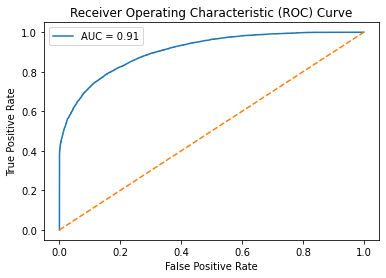

In [186]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train the model and predict probabilities for the test set
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:,1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


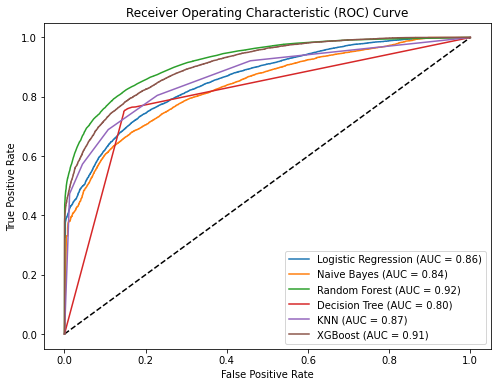

In [187]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [188]:
import plotly.express as px
import pandas as pd

# create a new DataFrame with the updated data
data = {
    'Model': ['LogisticRegression', 'Naive_bayes', 'Random Forest', 'Decision_tree', 'KNN', 'XGBoost'],
    'Score': [0.793, 0.579, 0.852, 0.814, 0.817, 0.835],
    'Accuracy Score': [0.793, 0.578, 0.852, 0.814, 0.817, 0.835]
}
models = pd.DataFrame(data)

# create the bar chart
fig = px.bar(data_frame=models, x='Score', y='Model', color='Accuracy Score', template='plotly_dark', title='Models Comparison')

# show the chart
fig.show()


In [189]:
from sklearn.ensemble import RandomForestClassifier
import joblib
# create a RandomForestClassifier object
rfc = RandomForestClassifier()
# train the model on your dataset
rfc.fit(X_test,y_test)
# save the trained model as a file
filename = 'saved_model.pkl'
joblib.dump(rfc, filename)


['saved_model.pkl']